In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import complex_ode
from scipy.integrate import ode
from scipy.integrate import odeint
mode_index = np.arange(-40,41,1,int)
simulation_time = np.arange(0,16,1,int)

# 1. Dispersion + Coupling

Original condition: a_0 = 1. The following codes solve the ODEs consisting of 80 model indexs coming from the LLE.

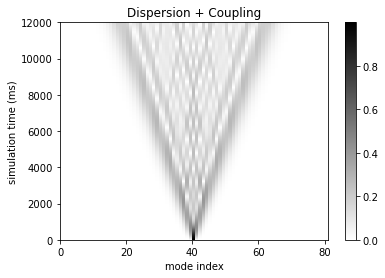

In [10]:
z = complex(0,1)
def lle_dis_cou (t,a):
    da = np.array([complex(0, 0) for i in range(81)])
    da[0] = z*a[0]*a[0] + z*1*(a[1])
    da[80] = z*a[80]*a[80] + z*1*(a[79])
    for i in range (1, 80):
        da[i] = z*a[i]*a[i] + z*1*(a[i-1] + a[i+1])
    return da

#a_initial = np.zeros(81)

a_initial = np.array([complex(0, 0) for i in range(81)])
a_initial[40] +=1 
t = np.linspace(0, 11, 1000)

r = ode(lle_dis_cou).set_integrator('zvode', method='bdf')
r.set_initial_value(a_initial, 0)

t1 = 12
dt=0.001

tt = []
aaa = []
while r.successful() and r.t < t1:
    x = r.t+dt
    y = r.integrate(r.t+dt)
    aaa.append (y)
    tt.append (x)

aaa_amp = np.zeros((len(aaa),len(aaa[0])))
for i in range (len(aaa)):
    for j in range (len(aaa[0])):
        aaa_amp[i][j] = abs(aaa[i][j])

p1 = plt.pcolormesh(aaa_amp, cmap='binary')
plt.colorbar(p1)
plt.title('Dispersion + Coupling')
plt.xlabel('mode index')
plt.ylabel('simulation time (ms)')
plt.show()

# 2. Nonlinearity

In [ ]:
z = complex(0,1)
gamma = 10
l = 10
tao = 1
def lle_nonlinear (t,a):
    da = np.array([complex(0, 0) for i in range(81)])
    for i in range (len(da)):
        for j in range (len(da)):
            for k in range (len(da)):
                if (j+k-i<=40):
                    da[i] += z* gamma * l /tao * a[j] * a[k] * np.conj(a[j+k-i])
    return da


a_initial = np.array([complex(0, 0) for i in range(81)])
a_initial[40] +=1 
t = np.linspace(0, 11, 1000)

r = ode(lle_nonlinear).set_integrator('zvode', method='bdf')
r.set_initial_value(a_initial, 0)

t1 = 12
dt=0.1

tt = []
aaa = []
while r.successful() and r.t < t1:
    x = r.t+dt
    y = r.integrate(r.t+dt)
    aaa.append (y)
    tt.append (x)
    
print (len(aaa))
print (len(aaa[0]))
aaa_amp = np.zeros((len(aaa),len(aaa[0])))


for i in range (len(aaa)):
    for j in range (len(aaa[0])):
        aaa_amp[i][j] = abs(aaa[i][j])

p1 = plt.pcolormesh(aaa_amp)

p1 = plt.pcolormesh(aaa_amp, cmap='binary')
plt.colorbar(p1)
plt.title('Nonlinearity')
plt.xlabel('mode index')
plt.ylabel('simulation time (ms)')
plt.show()

# 3. Dispersion + Nonlinearity

In [ ]:
z = complex(0,1)

def lle_Dispersion_nonlinear (t,a):
    da = np.array([complex(0, 0) for i in range(81)])
    for i in range (len(da)):
        for j in range (len(da)):
            for k in range (len(da)):
                if (j+k-i<=40):
                    da[i] += z* gamma * l /tao * a[j] * a[k] * np.conj(a[j+k-i])
        da[i] += z*a[i]*a[i]
    return da


a_initial = np.array([complex(0, 0) for i in range(81)])
a_initial[40] +=1 
t = np.linspace(0, 11, 1000)

r = ode(lle_Dispersion_nonlinear).set_integrator('zvode', method='bdf')
r.set_initial_value(a_initial, 0)

t1 = 12
dt=0.1

tt = []
aaa = []
while r.successful() and r.t < t1:
    x = r.t+dt
    y = r.integrate(r.t+dt)
    aaa.append (y)
    tt.append (x)
    
print (len(aaa))
print (len(aaa[0]))
aaa_amp = np.zeros((len(aaa),len(aaa[0])))


for i in range (len(aaa)):
    for j in range (len(aaa[0])):
        aaa_amp[i][j] = abs(aaa[i][j])

p1 = plt.pcolormesh(aaa_amp)

p1 = plt.pcolormesh(aaa_amp, cmap='binary')
plt.colorbar(p1)
plt.title('Dispersion + Nonlinearity')
plt.xlabel('mode index')
plt.ylabel('simulation time (ms)')
plt.show()

# 4. All but loss

In [ ]:
z = complex(0,1)

def lle_all (t,a):
    da = np.array([complex(0, 0) for i in range(81)])
    da[0] = z*a[0]*a[0] + z*1*(a[1])
    da[80] = z*a[80]*a[80] + z*1*(a[79])
    for i in range (1, 80):
        da[i] = z*a[i]*a[i] + z*1*(a[i-1] + a[i+1])
    for i in range (len(da)):
        for j in range (len(da)):
            for k in range (len(da)):
                if (j+k-i<=40):
                    da[i] += z* gamma * l /tao * a[j] * a[k] * np.conj(a[j+k-i])
    return da


a_initial = np.array([complex(0, 0) for i in range(81)])
a_initial[40] +=1 
t = np.linspace(0, 11, 1000)

r = ode(lle_all).set_integrator('zvode', method='bdf')
r.set_initial_value(a_initial, 0)

t1 = 12
dt=0.1

tt = []
aaa = []
while r.successful() and r.t < t1:
    x = r.t+dt
    y = r.integrate(r.t+dt)
    aaa.append (y)
    tt.append (x)
    
print (len(aaa))
print (len(aaa[0]))
aaa_amp = np.zeros((len(aaa),len(aaa[0])))


for i in range (len(aaa)):
    for j in range (len(aaa[0])):
        aaa_amp[i][j] = abs(aaa[i][j])

p1 = plt.pcolormesh(aaa_amp)

p1 = plt.pcolormesh(aaa_amp, cmap='binary')
plt.colorbar(p1)
plt.title('All but loss')
plt.xlabel('mode index')
plt.ylabel('simulation time (ms)')
plt.show()